# CNN Algorithm on Pixcels Dataset

<b> Load Daset

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [104]:
!pip install tensorflow

In [105]:
!pip install keras

In [106]:
!pip install Theano

In [107]:
# Data loading 

# read train 
train = pd.read_csv(r"C:\Users\santhosh\Downloads\train.csv\train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# read test 
test= pd.read_csv(r"C:\Users\santhosh\Downloads\test1.csv\test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [110]:
# Display basic information for test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [111]:
# Summary statistics for train dataset
train.describe()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [112]:
# Summary statistics for test dataset
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [113]:
# Check for missing values in the train dataset
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [114]:
train.duplicated().sum()

0

In [116]:
# Check for missing values in the test dataset
test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [117]:
test.duplicated().sum()

0

<b> Exploratory Data analysis

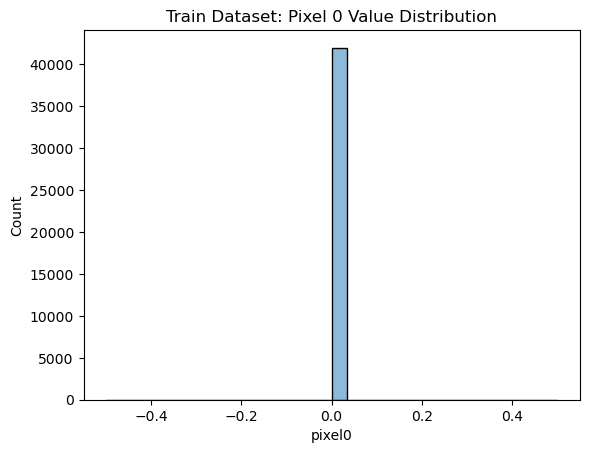

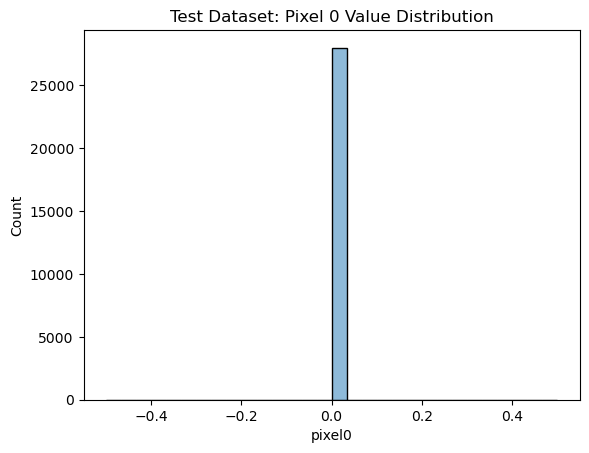

In [15]:
# Distribution of a specific pixel value (e.g., pixel_0) in train dataset
sns.histplot(train['pixel0'], bins=30, kde=True)
plt.title('Train Dataset: Pixel 0 Value Distribution')
plt.show()

# Distribution of a specific pixel value (e.g., pixel_0) in test dataset
sns.histplot(test['pixel0'], bins=30, kde=True)
plt.title('Test Dataset: Pixel 0 Value Distribution')
plt.show()


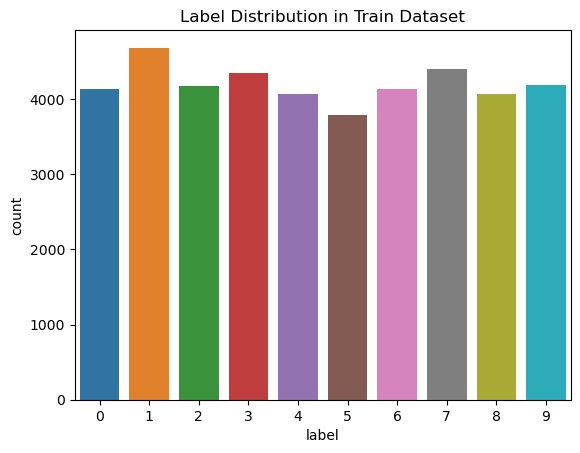

In [16]:
# Count plot for labels in the train dataset (assuming 'label' column exists)
sns.countplot(x='label', data=train)
plt.title('Label Distribution in Train Dataset')
plt.show()


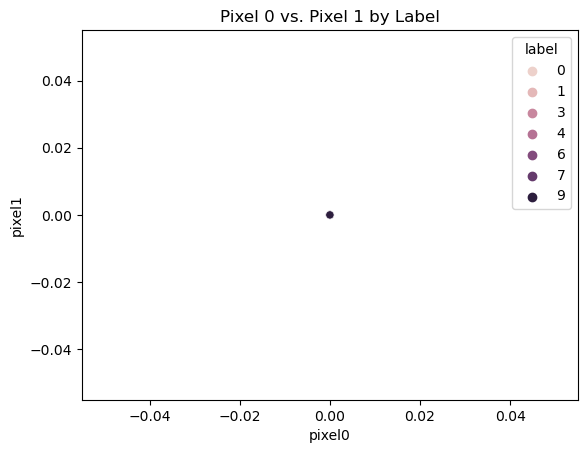

In [17]:
# Scatter plot between two specific pixels (e.g., pixel_0 and pixel_1)
sns.scatterplot(x='pixel0', y='pixel1', hue='label', data=train)
plt.title('Pixel 0 vs. Pixel 1 by Label')
plt.show()


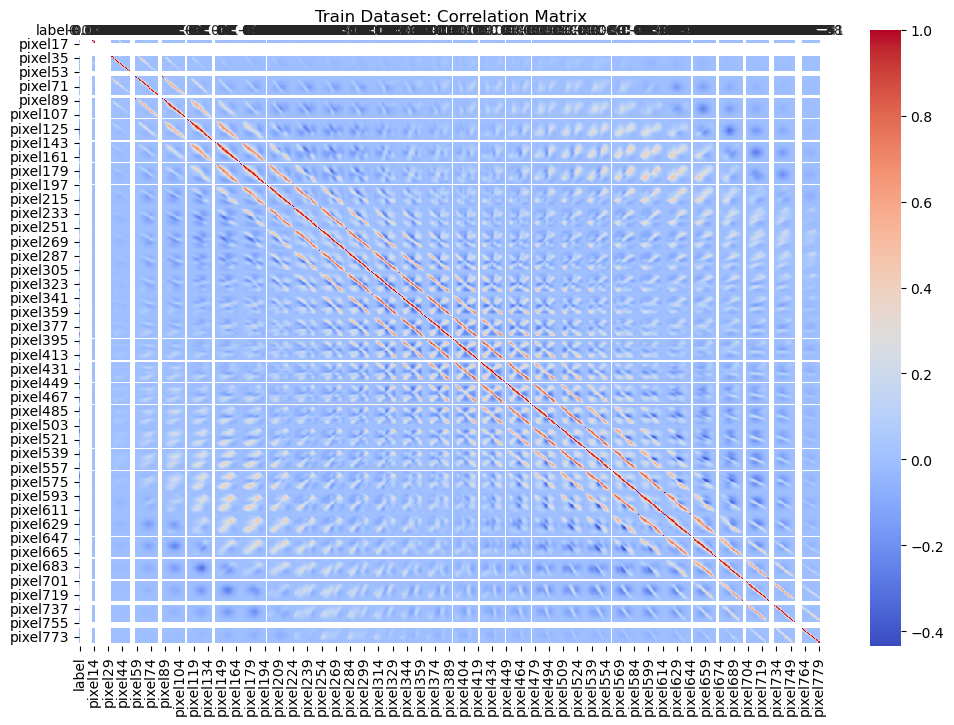

In [18]:
# Correlation matrix for train dataset
train_correlation_matrix = train.corr()

# Plot the heatmap for train dataset
plt.figure(figsize=(12, 8))
sns.heatmap(train_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Train Dataset: Correlation Matrix')
plt.show()


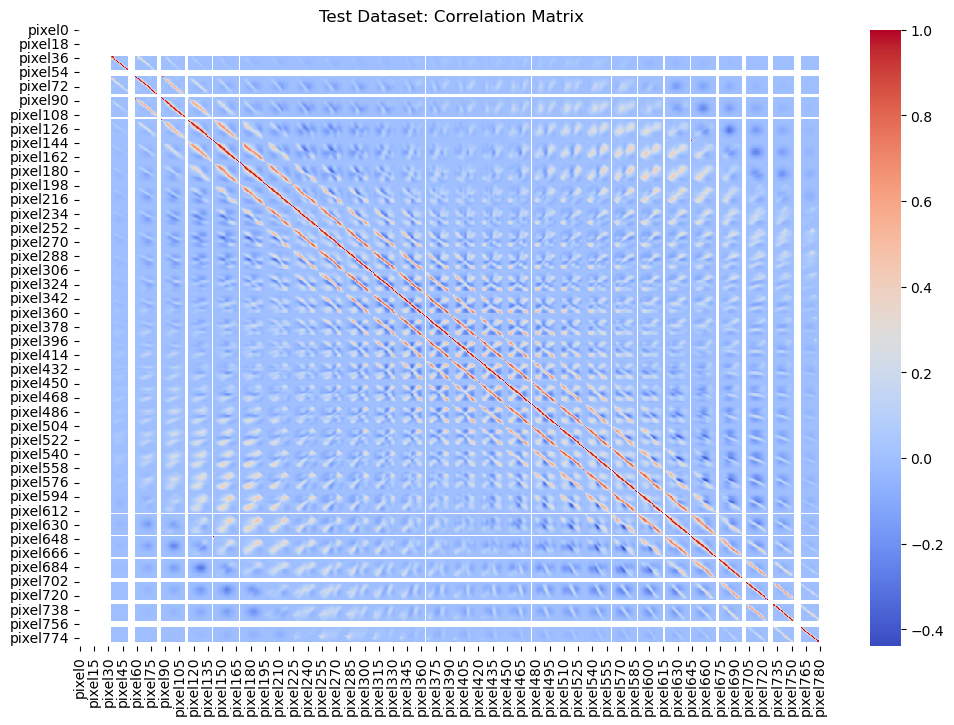

In [19]:
# Correlation matrix for test dataset
test_correlation_matrix = test.corr()

# Plot the heatmap for test dataset
plt.figure(figsize=(12, 8))
sns.heatmap(test_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Test Dataset: Correlation Matrix')
plt.show()


<b>Train-Test Split

In [20]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

In [21]:
X_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
Y_train.head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [23]:
Y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

<b> Normalization

In [24]:
# Normalize the data
#We perform a grayscale normalization to reduce the effect of illumination's differences.
#If we perform normalization, CNN works faster.
# 255 is thed fixed value og gray scale
X_train = X_train / 255.0
test = test / 255.0

In [25]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# shape is column is 784 square is 25 * 25 (h=25, w = 25, csnal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [26]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0] , 4 => [0,0,0,0,1,0,0,0,0,0])
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [27]:
# Split the train and the validation set for the fitting (10% test, 90% train)
from sklearn.model_selection import train_test_split
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

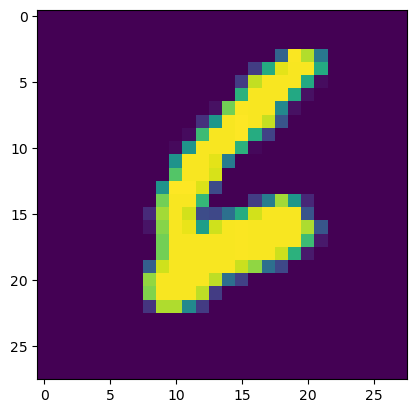

In [28]:
# Example - 
plt.imshow(X_train[33][:,:,0])

In [29]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

<b> Model Building

In [30]:
# CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

#hidden layer 1
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', # convolation 2D
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2))) # maxpool
model.add(Dropout(0.25)) # Dropout

#hidden layer 2
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', # convolation 2D
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # Maxpool
model.add(Dropout(0.25)) # dropout

#fully connected
model.add(Flatten()) #flattening
model.add(Dense(256, activation = "relu")) #dense
model.add(Dropout(0.5)) # dropout
model.add(Dense(10, activation = "softmax")) #softmax

In [31]:
# Defining Optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

<b>Compile the Model

In [32]:
# Compiling the Model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [33]:
# Setting Learning Rate Annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [34]:
epochs = 10
batch_size = 86

In [35]:
# data augmentation to prevent overfitting (accuracy 0.99286) simply the images are rotated

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

<b> Train the Model

In [36]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size, callbacks=[learning_rate_reduction])

Epoch 1/10
439/439 - 41s - 93ms/step - accuracy: 0.8443 - loss: 0.4869 - val_accuracy: 0.9793 - val_loss: 0.0699 - learning_rate: 0.0010
Epoch 2/10
439/439 - 2s - 3ms/step - accuracy: 0.9070 - loss: 0.2894 - val_accuracy: 0.9771 - val_loss: 0.0749 - learning_rate: 0.0010
Epoch 3/10
439/439 - 30s - 69ms/step - accuracy: 0.9468 - loss: 0.1706 - val_accuracy: 0.9812 - val_loss: 0.0708 - learning_rate: 0.0010
Epoch 4/10
439/439 - 1s - 2ms/step - accuracy: 0.9651 - loss: 0.0728 - val_accuracy: 0.9826 - val_loss: 0.0593 - learning_rate: 0.0010
Epoch 5/10
439/439 - 29s - 65ms/step - accuracy: 0.9621 - loss: 0.1272 - val_accuracy: 0.9869 - val_loss: 0.0463 - learning_rate: 0.0010
Epoch 6/10
439/439 - 1s - 2ms/step - accuracy: 0.9651 - loss: 0.0561 - val_accuracy: 0.9857 - val_loss: 0.0424 - learning_rate: 0.0010
Epoch 7/10
439/439 - 27s - 60ms/step - accuracy: 0.9660 - loss: 0.1122 - val_accuracy: 0.9876 - val_loss: 0.0411 - learning_rate: 0.0010
Epoch 8/10
439/439 - 1s - 2ms/step - accuracy: 

<b> Model Evaluation

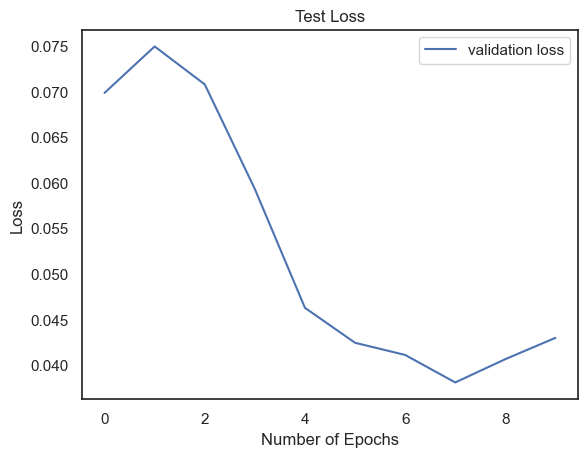

In [37]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<b> Confusion Matrix

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


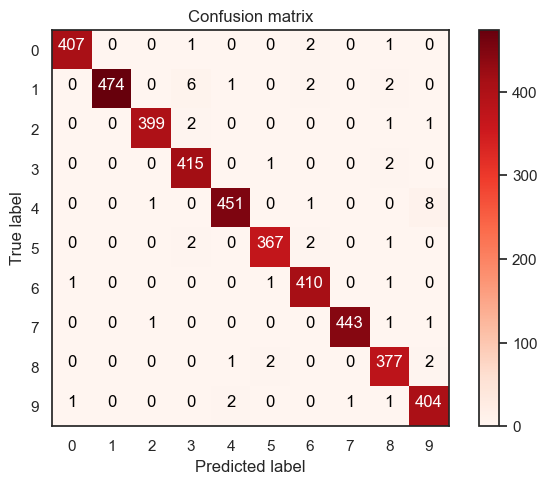

In [38]:
 
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(Y_val,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plot_confusion_matrix(confusion_mtx, classes = range(10))

<b> Error Prediction

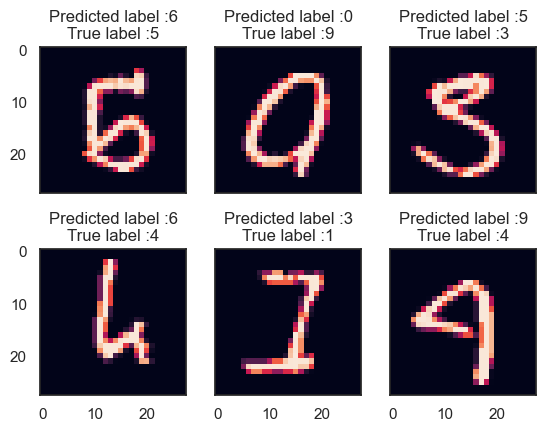

In [39]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

sorted_dela_errors = np.argsort(delta_pred_true_errors)


most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

<b>Predicted Values

In [40]:
results = model.predict(test)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


In [41]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
